In [1]:
##############################################################################################################
# DESCRIPTION: Ensemble
#              
# RESULTS:     AEConnections da mejores resultados en media. Hay imágenes en que
#              accuracy es mejor en un caso pero no el MSE.
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################
import os, sys

IMG_WIDTH = 256
IMG_HEIGHT = 256

IMG_CASE = str(IMG_WIDTH) +  "/0100_1000"
SAVED_MODEL = "0100_1000-ensemble-a"
SAVED_MODEL_UNET = "0100_1000-256-unet-b-nadam-b"
SAVED_MODEL_RESNET = "0100_1000-256-resnet-b"
SAVED_MODEL_CONVSIM = "0100_1000-256-convsim-b"
SAVED_MODEL_AECONNECT = "0100_1000-256-aeconnect-a"
class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0898
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.3248

In [3]:
##################
# PATHS
##################

IMG_PATH = os.path.abspath(os.path.join('../../../dataset/cases/', IMG_CASE))
IMG_PATH_VALID = os.path.join( IMG_PATH , 'validation')
IMG_PATH_TEST = IMG_PATH + "/test/"
IMG_PATH_TRAIN = IMG_PATH

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', SAVED_MODEL))

In [4]:
##################
# IMPORTS
##################

import tensorflow as tf
from tensorflow.compat.v1 import InteractiveSession

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)

import DatasetUtilsTifF as dsutils
import ReportsJ as reports
import keras.models

In [5]:
model_unet = keras.models.load_model(os.path.abspath(os.path.join('../../../saves/' + SAVED_MODEL_UNET)))
model_resnet = keras.models.load_model(os.path.abspath(os.path.join('../../../saves/' + SAVED_MODEL_RESNET)))
model_convsim = keras.models.load_model(os.path.abspath(os.path.join('../../../saves/' + SAVED_MODEL_CONVSIM)))
model_aeconnect = keras.models.load_model(os.path.abspath(os.path.join('../../../saves/' + SAVED_MODEL_AECONNECT)))


In [6]:
models=[model_unet, model_resnet, model_convsim, model_aeconnect]

In [7]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid \
    = dsutils.readDataset( IMG_PATH_TRAIN, IMG_WIDTH, IMG_HEIGHT, radiance_limits)

val_noisy_files, val_nitid_files, val_noisy, val_nitid \
    = dsutils.readDataset( IMG_PATH_VALID, IMG_WIDTH, IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid \
    = dsutils.reshapeDataset( train_noisy, train_nitid, IMG_WIDTH, IMG_HEIGHT )

val_noisy, val_nitid \
    = dsutils.reshapeDataset( val_noisy, val_nitid, IMG_WIDTH, IMG_HEIGHT )

Read dataset. Path: D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000
Noisy files:606
Nitid files:606
Read dataset. Path: D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000\validation
Noisy files:148
Nitid files:148


In [9]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetricsModels( models, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Images count =148
Best MSE     =147 (0.99)
Best Accuracy=148 (1.00)
MSE-NZ   Pred=0.0007  Noisy=0.0126
MSE      Pred=0.0007  Noisy=0.0111
PSNR     Pred=22.6 dB Noisy=10.8 dB
Accuracy Pred=0.38    Noisy=0.08
SSM      Pred=0.92    Noisy=0.63
HOG MSE  Pred=0.05    Noisy=0.04


Read dataset. Path: D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test/
Noisy files:8
Nitid files:8
Index:0
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0112_01_02noisy_idx123.tif
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0112_01_02nitid_idx134.tif


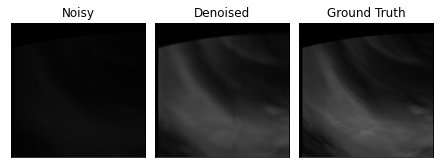

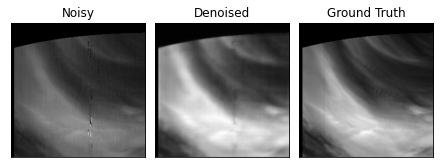

MSE-NZ   Pred=0.0003  Noisy=0.0221
MSE      Pred=0.0003  Noisy=0.0191 BEST
PSNR     Pred=26.5 dB Noisy=8.4 dB BEST
Accuracy Pred=0.50    Noisy=0.00 BEST
SSM      Pred=0.94    Noisy=0.45
HOG MSE  Pred=0.03    Noisy=0.07
******************************************************
Index:1
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0127_01_02noisy_idx123.tif
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0127_01_02nitid_idx134.tif


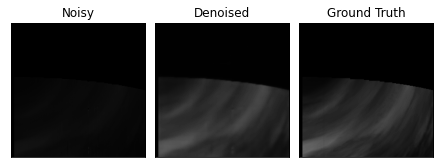

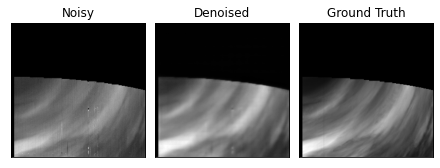

MSE-NZ   Pred=0.0003  Noisy=0.0177
MSE      Pred=0.0003  Noisy=0.0101 BEST
PSNR     Pred=27.7 dB Noisy=9.5 dB BEST
Accuracy Pred=0.63    Noisy=0.05 BEST
SSM      Pred=0.84    Noisy=0.53
HOG MSE  Pred=0.06    Noisy=0.05
******************************************************
Index:2
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0318_04_03noisy_idx157.tif
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0318_04_03nitid_idx146.tif


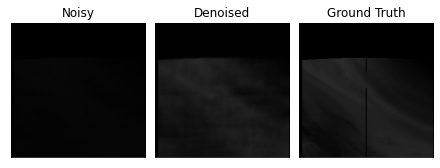

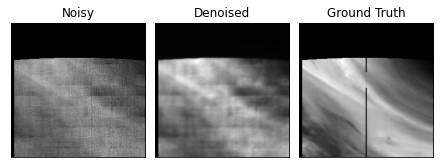

MSE-NZ   Pred=0.0003  Noisy=0.0065
MSE      Pred=0.0003  Noisy=0.0047 BEST
PSNR     Pred=20.9 dB Noisy=6.9 dB BEST
Accuracy Pred=0.56    Noisy=0.04 BEST
SSM      Pred=0.88    Noisy=0.52
HOG MSE  Pred=0.08    Noisy=0.11
******************************************************
Index:3
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0322_04_00noisy_idx014.tif
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0322_04_00nitid_idx017.tif


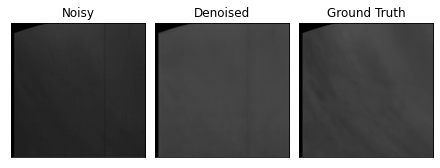

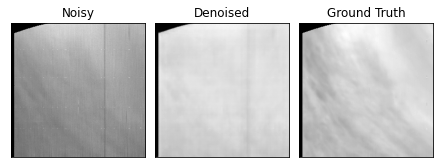

MSE-NZ   Pred=0.0005  Noisy=0.0071
MSE      Pred=0.0005  Noisy=0.0068 BEST
PSNR     Pred=22.7 dB Noisy=11.3 dB BEST
Accuracy Pred=0.28    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.86
HOG MSE  Pred=0.02    Noisy=0.02
******************************************************
Index:4
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0322_04_02noisy_idx123.tif
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0322_04_02nitid_idx134.tif


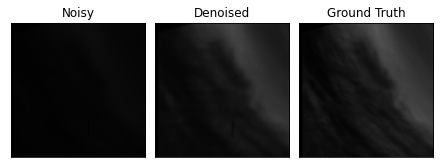

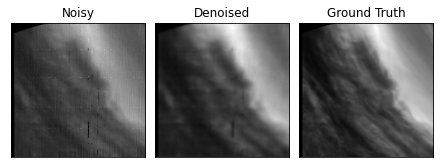

MSE-NZ   Pred=0.0007  Noisy=0.0130
MSE      Pred=0.0007  Noisy=0.0126 BEST
PSNR     Pred=22.2 dB Noisy=9.4 dB BEST
Accuracy Pred=0.29    Noisy=0.02 BEST
SSM      Pred=0.95    Noisy=0.48
HOG MSE  Pred=0.04    Noisy=0.08
******************************************************
Index:5
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0323_04_03noisy_idx157.tif
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0323_04_03nitid_idx146.tif


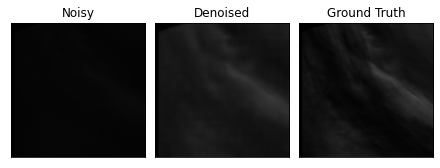

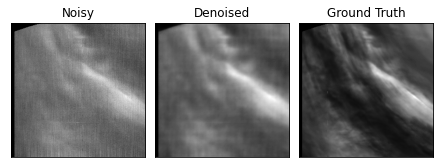

MSE-NZ   Pred=0.0011  Noisy=0.0041
MSE      Pred=0.0011  Noisy=0.0039 BEST
PSNR     Pred=18.7 dB Noisy=12.9 dB BEST
Accuracy Pred=0.24    Noisy=0.12 BEST
SSM      Pred=0.87    Noisy=0.45
HOG MSE  Pred=0.04    Noisy=0.06
******************************************************
Index:6
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0379_01_02noisy_idx123.tif
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0379_01_02nitid_idx134.tif


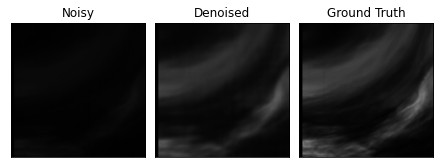

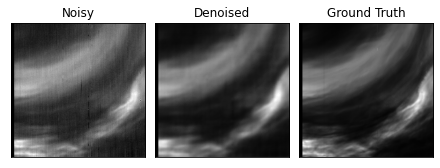

MSE-NZ   Pred=0.0009  Noisy=0.0140
MSE      Pred=0.0009  Noisy=0.0137 BEST
PSNR     Pred=24.6 dB Noisy=12.4 dB BEST
Accuracy Pred=0.37    Noisy=0.08 BEST
SSM      Pred=0.95    Noisy=0.47
HOG MSE  Pred=0.02    Noisy=0.05
******************************************************
Index:7
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0379_05_02noisy_idx123.tif
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0379_05_02nitid_idx134.tif


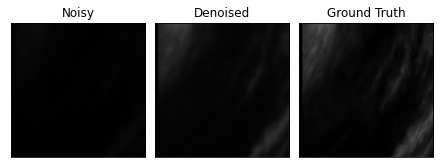

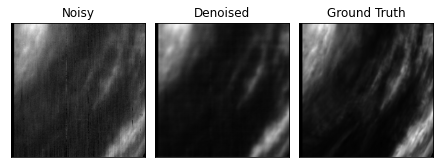

MSE-NZ   Pred=0.0007  Noisy=0.0054
MSE      Pred=0.0007  Noisy=0.0052 BEST
PSNR     Pred=22.1 dB Noisy=13.4 dB BEST
Accuracy Pred=0.54    Noisy=0.22 BEST
SSM      Pred=0.91    Noisy=0.62
HOG MSE  Pred=0.04    Noisy=0.04
******************************************************


In [10]:
ACCURACY_THRESHOLD = 0.01

test_noisy_files, test_nitid_files, test_noisy, test_nitid \
    = dsutils.readDataset( IMG_PATH_TEST, IMG_WIDTH, IMG_HEIGHT, radiance_limits)

test_noisy, test_nitid \
    = dsutils.reshapeDataset( test_noisy, test_nitid, IMG_WIDTH, IMG_HEIGHT )

test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexesModels( models, test_noisy, test_nitid, test_noisy_files, test_nitid_files, \
                        test_indexes, ACCURACY_THRESHOLD )